In [17]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense
import numpy as np
import matplotlib.pyplot as plt
from keras.preprocessing.image import ImageDataGenerator
from keras.utils import to_categorical
from sklearn import metrics
import h5py
from sklearn import utils

In [2]:
images = np.load('right__Chiral_D_Large_TIFF_Cropped_four_rows_sel_NPs.npy')
labels = [[1,0] for i in np.arange(0,len(images))]

In [3]:
images.shape

(156, 128, 128)

In [4]:
len(labels)

156

In [5]:
labels = np.array(labels)

In [7]:
import sys

In [8]:
sys.path.append('/Users/cgroschner/Documents/HTTEM/segmentation/')

In [9]:
import realDataProcess as rdp

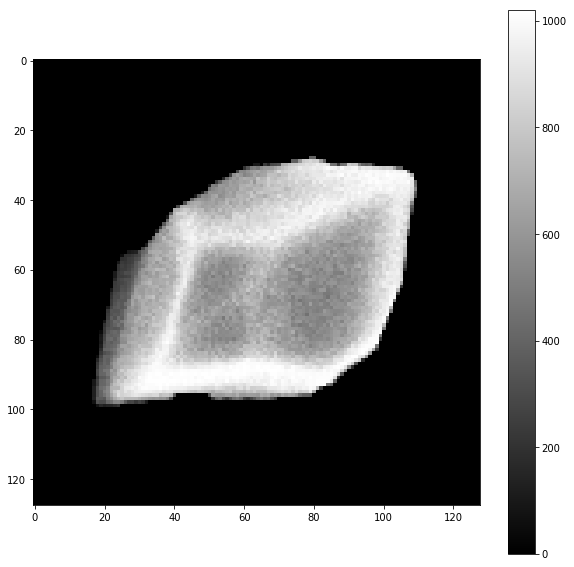

In [12]:
rdp.imm(np.fliplr(images[1]),(128,128))

In [13]:
left_images = []
left_labels = []
for img in images:
    left_images.append(np.fliplr(img))
    left_labels.append([0,1])

In [14]:
lr_images = np.concatenate((images,left_images),axis=0)
lr_labels = np.concatenate((labels,left_labels),axis = 0)

In [16]:
lr_images.shape

(312, 128, 128)

In [19]:
0.25*156

39.0

In [76]:
new_labels = [0 for i in np.arange(0,156)]

In [77]:
new_left_labels = [1 for i in np.arange(0,156)]

In [78]:
lbls = np.concatenate((new_labels,new_left_labels),axis=0)

In [79]:
lbls.shape

(312,)

In [80]:
lbls

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [69]:
from keras.utils import to_categorical

In [81]:
lbls_cat = to_categorical(lbls)

In [83]:
lbls_cat.shape

(312, 2)

In [91]:
left_labels = np.array(left_labels)

In [98]:
X_train = np.concatenate((images[:-39],left_images[:-39]),axis =0)
Y_train = np.concatenate((labels[:-39],left_labels[:-39]),axis = 0)
X_test = np.concatenate((images[-39:],left_images[-39:]),axis = 0)
Y_test = np.concatenate((labels[-39:],left_labels[-39:]),axis = 0)

In [99]:
batch_size = 16

In [100]:
X_train_norm = X_train/X_train.max()
X_test_norm = X_test/X_test.max()

In [101]:
X_train_norm = np.expand_dims(X_train_norm,axis=3)
X_test_norm = np.expand_dims(X_test_norm,axis=3)

In [102]:
X_train_norm, Y_train = utils.shuffle(X_train_norm, Y_train,random_state=0)
X_test_norm, Y_test = utils.shuffle(X_test_norm, Y_test,random_state=0)

In [103]:
X_train_norm.shape

(234, 128, 128, 1)

In [104]:
Y_train.shape

(234, 2)

In [105]:
train_datagen = ImageDataGenerator(
        rotation_range = 60,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=False,
        vertical_flip = False)

In [106]:
test_datagen = ImageDataGenerator(rescale=1.)

In [107]:
seed = 42

In [108]:
X_test_norm.shape

(78, 128, 128, 1)

In [109]:
train_generator = train_datagen.flow(X_train_norm, y=Y_train, batch_size=batch_size,seed=seed)
val_generator = test_datagen.flow(X_test_norm,y=Y_test,batch_size=batch_size,seed=seed)

In [110]:
model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=(128, 128,1)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())  # this converts our 3D feature maps to 1D feature vectors
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(2))
model.add(Activation('softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

In [112]:
history = model.fit_generator(
        train_generator,
        steps_per_epoch=500 // batch_size,
        epochs=20,
        validation_data=val_generator,
        validation_steps=200 // batch_size)

Epoch 1/20
31/31 [==============================] - 6s 197ms/step - loss: 0.6901 - acc: 0.5286 - val_loss: 0.6822 - val_acc: 0.5532
Epoch 2/20
31/31 [==============================] - 6s 193ms/step - loss: 0.6846 - acc: 0.5237 - val_loss: 0.6837 - val_acc: 0.5426
Epoch 3/20
31/31 [==============================] - 6s 192ms/step - loss: 0.6815 - acc: 0.5508 - val_loss: 0.7004 - val_acc: 0.5213
Epoch 4/20
31/31 [==============================] - 6s 196ms/step - loss: 0.6827 - acc: 0.5524 - val_loss: 0.6806 - val_acc: 0.5266
Epoch 5/20
31/31 [==============================] - 6s 192ms/step - loss: 0.6867 - acc: 0.5553 - val_loss: 0.6811 - val_acc: 0.5638
Epoch 6/20
31/31 [==============================] - 6s 194ms/step - loss: 0.6639 - acc: 0.5908 - val_loss: 0.6616 - val_acc: 0.6436
Epoch 7/20
31/31 [==============================] - 6s 194ms/step - loss: 0.6617 - acc: 0.6166 - val_loss: 0.6616 - val_acc: 0.5426
Epoch 8/20
31/31 [==============================] - 6s 195ms/step - loss: 0.

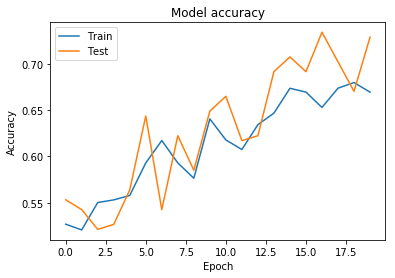

In [113]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [114]:
from keras.optimizers import Adam

In [117]:
model1 = Sequential()
model1.add(Conv2D(32, (3, 3), input_shape=(128, 128,1)))
model1.add(Activation('relu'))
model1.add(MaxPooling2D(pool_size=(2, 2)))

model1.add(Conv2D(32, (3, 3)))
model1.add(Activation('relu'))
model1.add(MaxPooling2D(pool_size=(2, 2)))

model1.add(Conv2D(64, (3, 3)))
model1.add(Activation('relu'))
model1.add(MaxPooling2D(pool_size=(2, 2)))

model1.add(Conv2D(64, (3, 3)))
model1.add(Activation('relu'))
model1.add(MaxPooling2D(pool_size=(2, 2)))

model1.add(Conv2D(64, (3, 3)))
model1.add(Activation('relu'))
model1.add(MaxPooling2D(pool_size=(2, 2)))

model1.add(Flatten())  # this converts our 3D feature maps to 1D feature vectors
model1.add(Dense(64))
model1.add(Activation('relu'))
model1.add(Dropout(0.5))
model1.add(Dense(2))
model1.add(Activation('softmax'))

model1.compile(loss='categorical_crossentropy',
              optimizer=Adam(lr=1e-4),
              metrics=['accuracy'])

In [118]:
history1 = model1.fit_generator(
        train_generator,
        steps_per_epoch=500 // batch_size,
        epochs=20,
        validation_data=val_generator,
        validation_steps=200 // batch_size)

Epoch 1/20
31/31 [==============================] - 7s 227ms/step - loss: 0.6944 - acc: 0.5029 - val_loss: 0.6936 - val_acc: 0.5532
Epoch 2/20
31/31 [==============================] - 6s 204ms/step - loss: 0.6945 - acc: 0.4787 - val_loss: 0.6930 - val_acc: 0.5798
Epoch 3/20
31/31 [==============================] - 6s 209ms/step - loss: 0.6932 - acc: 0.5213 - val_loss: 0.6930 - val_acc: 0.5426
Epoch 4/20
31/31 [==============================] - 6s 202ms/step - loss: 0.6923 - acc: 0.5222 - val_loss: 0.6928 - val_acc: 0.5106
Epoch 5/20
31/31 [==============================] - 6s 206ms/step - loss: 0.6940 - acc: 0.4588 - val_loss: 0.6929 - val_acc: 0.5426
Epoch 6/20
31/31 [==============================] - 7s 213ms/step - loss: 0.6927 - acc: 0.5161 - val_loss: 0.6931 - val_acc: 0.5000
Epoch 7/20
31/31 [==============================] - 6s 208ms/step - loss: 0.6944 - acc: 0.4850 - val_loss: 0.6936 - val_acc: 0.4255
Epoch 8/20
31/31 [==============================] - 7s 230ms/step - loss: 0.

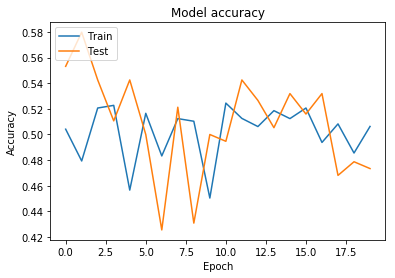

In [119]:
plt.plot(history1.history['acc'])
plt.plot(history1.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [120]:
model2 = Sequential()
model2.add(Conv2D(32, (3, 3), input_shape=(128, 128,1)))
model2.add(Activation('relu'))
model2.add(MaxPooling2D(pool_size=(2, 2)))

model2.add(Conv2D(32, (3, 3)))
model2.add(Activation('relu'))
model2.add(MaxPooling2D(pool_size=(2, 2)))

model2.add(Conv2D(64, (3, 3)))
model2.add(Activation('relu'))
model2.add(MaxPooling2D(pool_size=(2, 2)))

model2.add(Conv2D(64, (3, 3)))
model2.add(Activation('relu'))
model2.add(MaxPooling2D(pool_size=(2, 2)))

model2.add(Conv2D(64, (3, 3)))
model2.add(Activation('relu'))
model2.add(MaxPooling2D(pool_size=(2, 2)))

model2.add(Flatten())  # this converts our 3D feature maps to 1D feature vectors
model2.add(Dense(64))
model2.add(Activation('relu'))
model2.add(Dropout(0.5))
model2.add(Dense(2))
model2.add(Activation('softmax'))

model2.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

In [121]:
history2 = model1.fit_generator(
        train_generator,
        steps_per_epoch=500 // batch_size,
        epochs=20,
        validation_data=val_generator,
        validation_steps=200 // batch_size)

Epoch 1/20
31/31 [==============================] - 7s 213ms/step - loss: 0.6929 - acc: 0.5208 - val_loss: 0.6942 - val_acc: 0.3777
Epoch 2/20
31/31 [==============================] - 6s 204ms/step - loss: 0.6926 - acc: 0.5113 - val_loss: 0.6930 - val_acc: 0.5213
Epoch 3/20
31/31 [==============================] - 6s 201ms/step - loss: 0.6934 - acc: 0.4882 - val_loss: 0.6931 - val_acc: 0.5000
Epoch 4/20
31/31 [==============================] - 6s 208ms/step - loss: 0.6933 - acc: 0.5047 - val_loss: 0.6931 - val_acc: 0.4787
Epoch 5/20
31/31 [==============================] - 6s 207ms/step - loss: 0.6924 - acc: 0.5213 - val_loss: 0.6934 - val_acc: 0.4787
Epoch 6/20
31/31 [==============================] - 6s 205ms/step - loss: 0.6931 - acc: 0.5165 - val_loss: 0.6933 - val_acc: 0.5000
Epoch 7/20
31/31 [==============================] - 6s 205ms/step - loss: 0.6922 - acc: 0.5242 - val_loss: 0.6937 - val_acc: 0.4840
Epoch 8/20
31/31 [==============================] - 6s 206ms/step - loss: 0.

Text(0.5,1,'[0 1]')

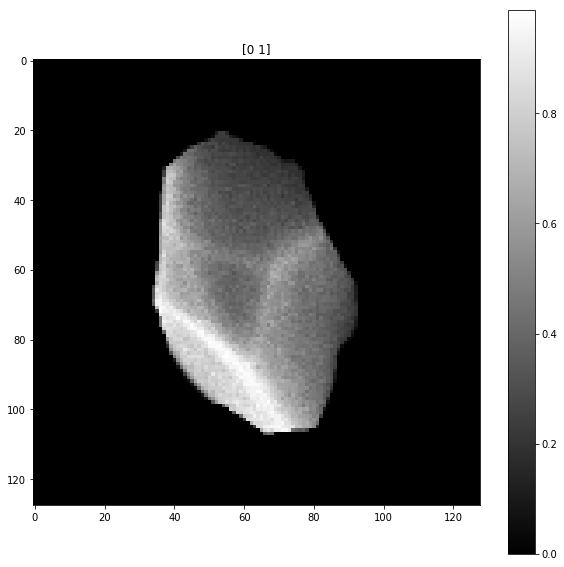

In [129]:
#Why isn't this learning?!
rdp.imm(X_train_norm[5],(128,128))
plt.title(Y_train[5])

# Now trying with rotated

In [242]:
right_images = np.load('right__Chiral_D_Large_TIFF_Cropped_four_rows_sel_NPs_rotated.npy')
right_labels = [[1,0] for i in np.arange(0,len(images))]

In [243]:
left_images = []
left_labels = []
for img in right_images:
    left_images.append(np.fliplr(img))
    left_labels.append([0,1])

In [244]:
X_train = np.concatenate((right_images[:-39],left_images[:-39]),axis =0)
Y_train = np.concatenate((right_labels[:-39],left_labels[:-39]),axis = 0)
X_test = np.concatenate((right_images[-39:],left_images[-39:]),axis = 0)
Y_test = np.concatenate((right_labels[-39:],left_labels[-39:]),axis = 0)

In [245]:
X_train_norm = X_train/X_train.max()
X_test_norm = X_test/X_test.max()
X_train_norm = np.expand_dims(X_train_norm,axis=3)
X_test_norm = np.expand_dims(X_test_norm,axis=3)

In [246]:
X_train_shuff, Y_train_shuff = utils.shuffle(X_train_norm, Y_train,random_state=0)
X_test_shuff, Y_test_shuff = utils.shuffle(X_test_norm, Y_test,random_state=0)

In [277]:
i = h5py.File('Train_shuff_Chiral_D_Large_TIFF_Cropped_four_rows_sel_NPs_rotated.h5','w')

In [278]:
i.create_dataset('images',data=X_train_shuff)
i.create_dataset('labels',data=Y_train_shuff)
i.close()

In [279]:
i = h5py.File('Test_shuff_Chiral_D_Large_TIFF_Cropped_four_rows_sel_NPs_rotated.h5','w')

In [280]:
i.create_dataset('images',data=X_test_shuff)
i.create_dataset('labels',data=Y_test_shuff)
i.close()

In [247]:
train_datagen = ImageDataGenerator(
        rotation_range = 10,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=False,
        vertical_flip = False)

In [248]:
test_datagen = ImageDataGenerator(rescale=1.)

In [249]:
train_generator = train_datagen.flow(X_train_shuff, y=Y_train_shuff, batch_size=batch_size,seed=seed)
val_generator = test_datagen.flow(X_test_shuff,y=Y_test_shuff,batch_size=batch_size,seed=seed)

In [252]:
del modelA

In [253]:
modelA = Sequential()
modelA.add(Conv2D(32, (3, 3), input_shape=(128, 128,1)))
modelA.add(Activation('relu'))
modelA.add(MaxPooling2D(pool_size=(2, 2)))

modelA.add(Conv2D(32, (3, 3)))
modelA.add(Activation('relu'))
modelA.add(MaxPooling2D(pool_size=(2, 2)))

modelA.add(Conv2D(64, (3, 3)))
modelA.add(Activation('relu'))
modelA.add(MaxPooling2D(pool_size=(2, 2)))

modelA.add(Flatten())  # this converts our 3D feature maps to 1D feature vectors
modelA.add(Dense(64))
modelA.add(Activation('relu'))
modelA.add(Dropout(0.5))
modelA.add(Dense(2))
modelA.add(Activation('softmax'))

modelA.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

In [254]:
historyA = modelA.fit_generator(
        train_generator,
        steps_per_epoch=500 // batch_size,
        epochs=20,
        validation_data=val_generator,
        validation_steps=200 // batch_size)

Epoch 1/20
31/31 [==============================] - 7s 215ms/step - loss: 0.6921 - acc: 0.5516 - val_loss: 0.5747 - val_acc: 0.7926
Epoch 2/20
31/31 [==============================] - 6s 198ms/step - loss: 0.6142 - acc: 0.6412 - val_loss: 0.4711 - val_acc: 0.7872
Epoch 3/20
31/31 [==============================] - 6s 196ms/step - loss: 0.5391 - acc: 0.7570 - val_loss: 0.5066 - val_acc: 0.7766
Epoch 4/20
31/31 [==============================] - 7s 223ms/step - loss: 0.4900 - acc: 0.7794 - val_loss: 0.4079 - val_acc: 0.7872
Epoch 5/20
31/31 [==============================] - 6s 205ms/step - loss: 0.4483 - acc: 0.8097 - val_loss: 0.4190 - val_acc: 0.8351
Epoch 6/20
31/31 [==============================] - 6s 197ms/step - loss: 0.4127 - acc: 0.8306 - val_loss: 0.3859 - val_acc: 0.8298
Epoch 7/20
31/31 [==============================] - 6s 193ms/step - loss: 0.3547 - acc: 0.8633 - val_loss: 0.4296 - val_acc: 0.8085
Epoch 8/20
31/31 [==============================] - 6s 193ms/step - loss: 0.

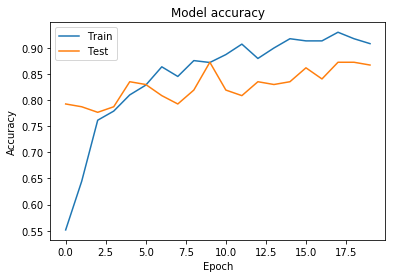

In [255]:

plt.plot(historyA.history['acc'])
plt.plot(historyA.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

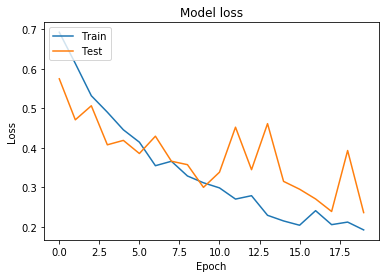

In [256]:
plt.plot(historyA.history['loss'])
plt.plot(historyA.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

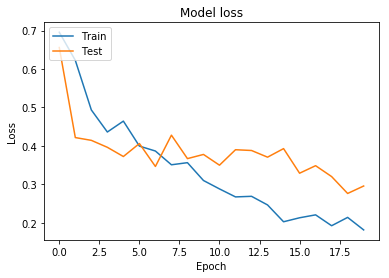

In [141]:
plt.plot(historyA.history['loss'])
plt.plot(historyA.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [257]:
del modelB

In [258]:
modelB = Sequential()
modelB.add(Conv2D(32, (3, 3), input_shape=(128, 128,1)))
modelB.add(Activation('relu'))
modelB.add(MaxPooling2D(pool_size=(2, 2)))

modelB.add(Conv2D(32, (3, 3)))
modelB.add(Activation('relu'))
modelB.add(MaxPooling2D(pool_size=(2, 2)))

modelB.add(Conv2D(64, (3, 3)))
modelB.add(Activation('relu'))
modelB.add(MaxPooling2D(pool_size=(2, 2)))

modelB.add(Conv2D(64, (3, 3)))
modelB.add(Activation('relu'))
modelB.add(MaxPooling2D(pool_size=(2, 2)))

modelB.add(Conv2D(64, (3, 3)))
modelB.add(Activation('relu'))
modelB.add(MaxPooling2D(pool_size=(2, 2)))

modelB.add(Flatten())  # this converts our 3D feature maps to 1D feature vectors
modelB.add(Dense(64))
modelB.add(Activation('relu'))
modelB.add(Dropout(0.5))
modelB.add(Dense(2))
modelB.add(Activation('softmax'))

modelB.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

In [259]:
historyB = modelB.fit_generator(
        train_generator,
        steps_per_epoch=500 // batch_size,
        epochs=20,
        validation_data=val_generator,
        validation_steps=200 // batch_size)

Epoch 1/20
31/31 [==============================] - 7s 228ms/step - loss: 0.7042 - acc: 0.5089 - val_loss: 0.6908 - val_acc: 0.5053
Epoch 2/20
31/31 [==============================] - 6s 200ms/step - loss: 0.6952 - acc: 0.5044 - val_loss: 0.6830 - val_acc: 0.5000
Epoch 3/20
31/31 [==============================] - 6s 199ms/step - loss: 0.6803 - acc: 0.5837 - val_loss: 0.6323 - val_acc: 0.8245
Epoch 4/20
31/31 [==============================] - 6s 203ms/step - loss: 0.6286 - acc: 0.6528 - val_loss: 0.5141 - val_acc: 0.7181
Epoch 5/20
31/31 [==============================] - 6s 209ms/step - loss: 0.5473 - acc: 0.7193 - val_loss: 0.4735 - val_acc: 0.7926
Epoch 6/20
31/31 [==============================] - 7s 211ms/step - loss: 0.4806 - acc: 0.7770 - val_loss: 0.4675 - val_acc: 0.7872
Epoch 7/20
31/31 [==============================] - 7s 212ms/step - loss: 0.4596 - acc: 0.7940 - val_loss: 0.4369 - val_acc: 0.7766
Epoch 8/20
31/31 [==============================] - 6s 209ms/step - loss: 0.

In [143]:
#original
historyB = modelB.fit_generator(
        train_generator,
        steps_per_epoch=500 // batch_size,
        epochs=20,
        validation_data=val_generator,
        validation_steps=200 // batch_size)

Epoch 1/20
31/31 [==============================] - 7s 230ms/step - loss: 0.7041 - acc: 0.4936 - val_loss: 0.6925 - val_acc: 0.5585
Epoch 2/20
31/31 [==============================] - 6s 206ms/step - loss: 0.6944 - acc: 0.5284 - val_loss: 0.6889 - val_acc: 0.6649
Epoch 3/20
31/31 [==============================] - 6s 205ms/step - loss: 0.6930 - acc: 0.5363 - val_loss: 0.6565 - val_acc: 0.6755
Epoch 4/20
31/31 [==============================] - 6s 205ms/step - loss: 0.6387 - acc: 0.6293 - val_loss: 0.5354 - val_acc: 0.6968
Epoch 5/20
31/31 [==============================] - 6s 208ms/step - loss: 0.6023 - acc: 0.6960 - val_loss: 0.4938 - val_acc: 0.8191
Epoch 6/20
31/31 [==============================] - 7s 210ms/step - loss: 0.5524 - acc: 0.7302 - val_loss: 0.4125 - val_acc: 0.8245
Epoch 7/20
31/31 [==============================] - 6s 203ms/step - loss: 0.4774 - acc: 0.7863 - val_loss: 0.4041 - val_acc: 0.8351
Epoch 8/20
31/31 [==============================] - 6s 210ms/step - loss: 0.

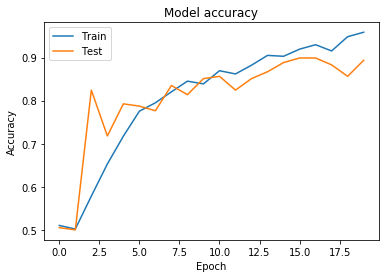

In [260]:
plt.plot(historyB.history['acc'])
plt.plot(historyB.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

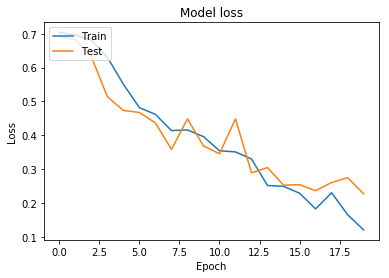

In [261]:
plt.plot(historyB.history['loss'])
plt.plot(historyB.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

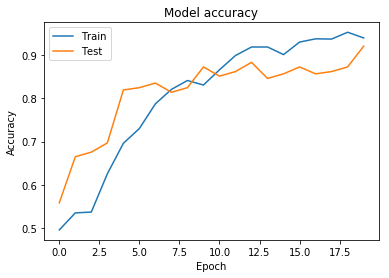

In [144]:
plt.plot(historyB.history['acc'])
plt.plot(historyB.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

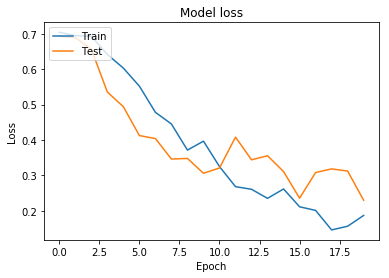

In [145]:
plt.plot(historyB.history['loss'])
plt.plot(historyB.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [146]:
modelB.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_32 (Conv2D)           (None, 126, 126, 32)      320       
_________________________________________________________________
activation_45 (Activation)   (None, 126, 126, 32)      0         
_________________________________________________________________
max_pooling2d_31 (MaxPooling (None, 63, 63, 32)        0         
_________________________________________________________________
conv2d_33 (Conv2D)           (None, 61, 61, 32)        9248      
_________________________________________________________________
activation_46 (Activation)   (None, 61, 61, 32)        0         
_________________________________________________________________
max_pooling2d_32 (MaxPooling (None, 30, 30, 32)        0         
_________________________________________________________________
conv2d_34 (Conv2D)           (None, 28, 28, 64)        18496     
__________

In [147]:
pred = modelB.predict(X_test_shuff)

In [163]:
unsure_idx = [idx for idx, p in enumerate(pred) if p[0] > 1e-2 and p[1] > 1e-2]

In [164]:
len(unsure_idx)

37

In [153]:
pred.shape

(78, 2)

Text(0.5,0,'[0.05237546 0.9476245 ]')

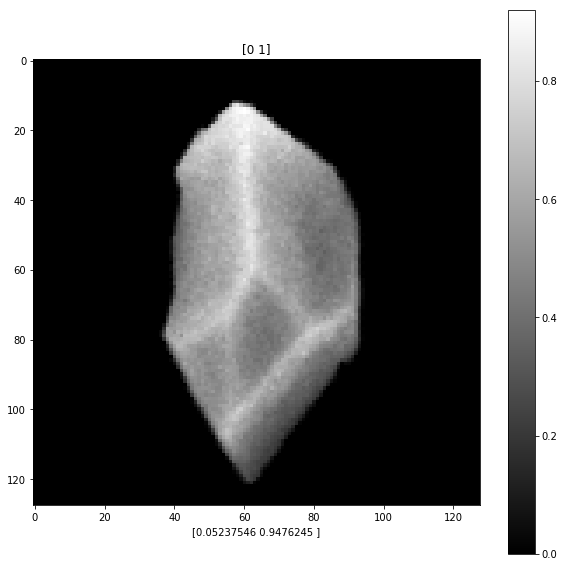

In [203]:
rdp.imm(X_test_shuff[unsure_idx[6]],(128,128))
plt.title(Y_test_shuff[unsure_idx[3]])
plt.xlabel(pred[unsure_idx[3]])

In [180]:
def thresh_labels(pred_stack):
    label_stack = []
    for p in pred_stack:
        if p[0] > p[1]:
            label_stack.append([1,0])
        else:
            label_stack.append([0,1])
    return np.array(label_stack)

In [181]:
thresh_pred = thresh_labels(pred)

In [182]:
metrics.accuracy_score(Y_test_shuff,thresh_pred)

0.9230769230769231

In [262]:
modelB.save('chiralnet_5conv_20200430_again.h5')

In [184]:
modelB.save('chiralnet_5conv_20200430.h5')

In [263]:
modelB.save_weights('chiralnet_5conv_20200430_weights_again.h5')

In [188]:
modelB.save_weights('chiralnet_5conv_20200430_weights.h5')

In [269]:
del modelC

In [270]:
modelC = Sequential()
modelC.add(Conv2D(32, (3, 3), input_shape=(128, 128,1)))
modelC.add(Activation('relu'))
modelC.add(MaxPooling2D(pool_size=(2, 2)))

modelC.add(Conv2D(32, (3, 3)))
modelC.add(Activation('relu'))
modelC.add(MaxPooling2D(pool_size=(2, 2)))

modelC.add(Conv2D(64, (3, 3)))
modelC.add(Activation('relu'))
modelC.add(MaxPooling2D(pool_size=(2, 2)))

modelC.add(Conv2D(64, (3, 3)))
modelC.add(Activation('relu'))
modelC.add(MaxPooling2D(pool_size=(2, 2)))

modelC.add(Conv2D(64, (3, 3)))
modelC.add(Activation('relu'))
modelC.add(MaxPooling2D(pool_size=(2, 2)))

modelC.add(Flatten())  # this converts our 3D feature maps to 1D feature vectors
modelC.add(Dense(64))
modelC.add(Activation('relu'))
modelC.add(Dropout(0.5))
modelC.add(Dense(2))
modelC.add(Activation('softmax'))

modelC.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

In [271]:
train_datagen = ImageDataGenerator(
        rotation_range = 90,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=False,
        vertical_flip = False)

test_datagen = ImageDataGenerator(rotation_range = 90)

train_generator = train_datagen.flow(X_train_shuff, y=Y_train_shuff, batch_size=batch_size,seed=seed)
val_generator = test_datagen.flow(X_test_shuff,y=Y_test_shuff,batch_size=batch_size,seed=seed)

In [272]:
historyC = modelC.fit_generator(
        train_generator,
        steps_per_epoch=500 // batch_size,
        epochs=40,
        validation_data=val_generator,
        validation_steps=200 // batch_size)

Epoch 1/40
31/31 [==============================] - 7s 236ms/step - loss: 0.7125 - acc: 0.5193 - val_loss: 0.6931 - val_acc: 0.5479
Epoch 2/40
31/31 [==============================] - 6s 206ms/step - loss: 0.6949 - acc: 0.5008 - val_loss: 0.6931 - val_acc: 0.5053
Epoch 3/40
31/31 [==============================] - 6s 203ms/step - loss: 0.6950 - acc: 0.4420 - val_loss: 0.6927 - val_acc: 0.5160
Epoch 4/40
31/31 [==============================] - 6s 202ms/step - loss: 0.6939 - acc: 0.4971 - val_loss: 0.6932 - val_acc: 0.5000
Epoch 5/40
31/31 [==============================] - 6s 203ms/step - loss: 0.6974 - acc: 0.4775 - val_loss: 0.6930 - val_acc: 0.5053
Epoch 6/40
31/31 [==============================] - 6s 200ms/step - loss: 0.6941 - acc: 0.4738 - val_loss: 0.6935 - val_acc: 0.4947
Epoch 7/40
31/31 [==============================] - 7s 224ms/step - loss: 0.6973 - acc: 0.5012 - val_loss: 0.6953 - val_acc: 0.5000
Epoch 8/40
31/31 [==============================] - 6s 205ms/step - loss: 0.

In [189]:
modelD = Sequential()
modelD.add(Conv2D(64, (3, 3), input_shape=(128, 128,1)))
modelD.add(Activation('relu'))
modelD.add(MaxPooling2D(pool_size=(2, 2)))

modelD.add(Conv2D(64, (3, 3)))
modelD.add(Activation('relu'))
modelD.add(MaxPooling2D(pool_size=(2, 2)))

modelD.add(Conv2D(64, (3, 3)))
modelD.add(Activation('relu'))
modelD.add(MaxPooling2D(pool_size=(2, 2)))

modelD.add(Conv2D(128, (3, 3)))
modelD.add(Activation('relu'))
modelD.add(MaxPooling2D(pool_size=(2, 2)))

modelD.add(Conv2D(128, (3, 3)))
modelD.add(Activation('relu'))
modelD.add(MaxPooling2D(pool_size=(2, 2)))

modelD.add(Flatten())  # this converts our 3D feature maps to 1D feature vectors
modelD.add(Dense(128))
modelD.add(Activation('relu'))
modelD.add(Dropout(0.5))
modelD.add(Dense(2))
modelD.add(Activation('softmax'))

modelD.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

In [273]:


train_datagen = ImageDataGenerator(
        rotation_range = 90,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=False,
        vertical_flip = False)

test_datagen = ImageDataGenerator(rotation_range = 90)

train_generator = train_datagen.flow(X_train_shuff, y=Y_train_shuff, batch_size=batch_size,seed=seed)
val_generator = test_datagen.flow(X_test_shuff,y=Y_test_shuff,batch_size=batch_size,seed=seed)

In [274]:
historyD = modelD.fit_generator(
        train_generator,
        steps_per_epoch=500 // batch_size,
        epochs=20,
        validation_data=val_generator,
        validation_steps=200 // batch_size)

Epoch 1/20
31/31 [==============================] - 12s 400ms/step - loss: 0.6946 - acc: 0.5612 - val_loss: 0.6710 - val_acc: 0.5585
Epoch 2/20
31/31 [==============================] - 12s 397ms/step - loss: 0.6839 - acc: 0.5372 - val_loss: 0.6705 - val_acc: 0.5745
Epoch 3/20
31/31 [==============================] - 12s 396ms/step - loss: 0.6673 - acc: 0.5669 - val_loss: 0.6403 - val_acc: 0.6170
Epoch 4/20
31/31 [==============================] - 12s 400ms/step - loss: 0.6712 - acc: 0.6261 - val_loss: 0.6852 - val_acc: 0.5479
Epoch 5/20
31/31 [==============================] - 12s 403ms/step - loss: 0.6649 - acc: 0.5899 - val_loss: 0.6403 - val_acc: 0.5851
Epoch 6/20
31/31 [==============================] - 12s 396ms/step - loss: 0.6477 - acc: 0.5937 - val_loss: 0.6699 - val_acc: 0.5479
Epoch 7/20
31/31 [==============================] - 12s 397ms/step - loss: 0.6193 - acc: 0.6463 - val_loss: 0.6651 - val_acc: 0.6223
Epoch 8/20
31/31 [==============================] - 12s 403ms/step - 

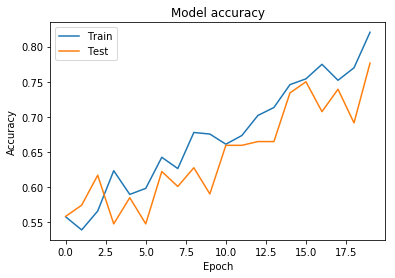

In [275]:
plt.plot(historyD.history['acc'])
plt.plot(historyD.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

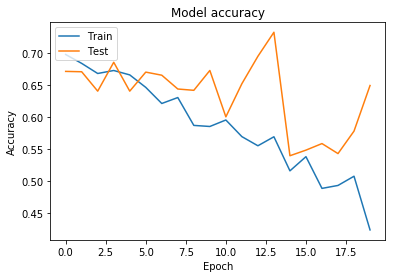

In [276]:
plt.plot(historyD.history['loss'])
plt.plot(historyD.history['val_loss'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [193]:
train_datagen = ImageDataGenerator(
        rotation_range = 45,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=False,
        vertical_flip = False)

test_datagen = ImageDataGenerator(rotation_range = 45)

train_generator = train_datagen.flow(X_train_norm, y=Y_train, batch_size=batch_size,seed=seed)
val_generator = test_datagen.flow(X_test_norm,y=Y_test,batch_size=batch_size,seed=seed)

In [195]:
modelD = Sequential()
modelD.add(Conv2D(64, (3, 3), input_shape=(128, 128,1)))
modelD.add(Activation('relu'))
modelD.add(MaxPooling2D(pool_size=(2, 2)))

modelD.add(Conv2D(64, (3, 3)))
modelD.add(Activation('relu'))
modelD.add(MaxPooling2D(pool_size=(2, 2)))

modelD.add(Conv2D(64, (3, 3)))
modelD.add(Activation('relu'))
modelD.add(MaxPooling2D(pool_size=(2, 2)))

modelD.add(Conv2D(128, (3, 3)))
modelD.add(Activation('relu'))
modelD.add(MaxPooling2D(pool_size=(2, 2)))

modelD.add(Conv2D(128, (3, 3)))
modelD.add(Activation('relu'))
modelD.add(MaxPooling2D(pool_size=(2, 2)))

modelD.add(Flatten())  # this converts our 3D feature maps to 1D feature vectors
modelD.add(Dense(128))
modelD.add(Activation('relu'))
modelD.add(Dropout(0.5))
modelD.add(Dense(2))
modelD.add(Activation('softmax'))

modelD.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

In [196]:
historyD = modelD.fit_generator(
        train_generator,
        steps_per_epoch=500 // batch_size,
        epochs=20,
        validation_data=val_generator,
        validation_steps=200 // batch_size)

Epoch 1/20
31/31 [==============================] - 13s 428ms/step - loss: 0.6988 - acc: 0.4824 - val_loss: 0.6939 - val_acc: 0.5053
Epoch 2/20
31/31 [==============================] - 13s 409ms/step - loss: 0.6970 - acc: 0.4299 - val_loss: 0.6932 - val_acc: 0.5000
Epoch 3/20
31/31 [==============================] - 13s 424ms/step - loss: 0.6951 - acc: 0.4839 - val_loss: 0.6933 - val_acc: 0.4894
Epoch 4/20
31/31 [==============================] - 13s 412ms/step - loss: 0.6998 - acc: 0.5378 - val_loss: 0.6934 - val_acc: 0.4947
Epoch 5/20
31/31 [==============================] - 13s 422ms/step - loss: 0.6948 - acc: 0.4818 - val_loss: 0.7056 - val_acc: 0.4787
Epoch 6/20
31/31 [==============================] - 13s 413ms/step - loss: 0.6949 - acc: 0.4855 - val_loss: 0.6931 - val_acc: 0.5053
Epoch 7/20
31/31 [==============================] - 13s 419ms/step - loss: 0.6948 - acc: 0.4580 - val_loss: 0.6931 - val_acc: 0.5106
Epoch 8/20
31/31 [==============================] - 13s 405ms/step - 

In [197]:
historyD = modelD.fit_generator(
        train_generator,
        steps_per_epoch=10000 // batch_size,
        epochs=20,
        validation_data=val_generator,
        validation_steps=10000 // batch_size)

Epoch 1/20
625/625 [==============================] - 303s 485ms/step - loss: 0.6941 - acc: 0.5011 - val_loss: 0.6931 - val_acc: 0.5004
Epoch 2/20
625/625 [==============================] - 306s 489ms/step - loss: 0.6936 - acc: 0.4896 - val_loss: 0.6932 - val_acc: 0.5000
Epoch 3/20
625/625 [==============================] - 304s 486ms/step - loss: 0.6935 - acc: 0.4870 - val_loss: 0.6931 - val_acc: 0.5000
Epoch 4/20
593/625 [===========================>..] - ETA: 11s - loss: 0.6933 - acc: 0.4961

KeyboardInterrupt: 

In [204]:
del modelD

In [205]:
train_datagen = ImageDataGenerator(
        rotation_range = 45,
        fill_mode = 'constant',
        cval = 0,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=False,
        vertical_flip = False)

test_datagen = ImageDataGenerator(rotation_range = 45,fill_mode = 'constant',cval = 0,)

train_generator = train_datagen.flow(X_train_norm, y=Y_train, batch_size=batch_size,seed=seed)
val_generator = test_datagen.flow(X_test_norm,y=Y_test,batch_size=batch_size,seed=seed)

In [206]:
modelD = Sequential()
modelD.add(Conv2D(64, (3, 3), input_shape=(128, 128,1)))
modelD.add(Activation('relu'))
modelD.add(MaxPooling2D(pool_size=(2, 2)))

modelD.add(Conv2D(64, (3, 3)))
modelD.add(Activation('relu'))
modelD.add(MaxPooling2D(pool_size=(2, 2)))

modelD.add(Conv2D(64, (3, 3)))
modelD.add(Activation('relu'))
modelD.add(MaxPooling2D(pool_size=(2, 2)))

modelD.add(Conv2D(128, (3, 3)))
modelD.add(Activation('relu'))
modelD.add(MaxPooling2D(pool_size=(2, 2)))

modelD.add(Conv2D(128, (3, 3)))
modelD.add(Activation('relu'))
modelD.add(MaxPooling2D(pool_size=(2, 2)))

modelD.add(Flatten())  # this converts our 3D feature maps to 1D feature vectors
modelD.add(Dense(128))
modelD.add(Activation('relu'))
modelD.add(Dropout(0.5))
modelD.add(Dense(2))
modelD.add(Activation('softmax'))

modelD.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

In [207]:
historyD = modelD.fit_generator(
        train_generator,
        steps_per_epoch=500 // batch_size,
        epochs=20,
        validation_data=val_generator,
        validation_steps=200 // batch_size)

Epoch 1/20
31/31 [==============================] - 14s 439ms/step - loss: 0.6985 - acc: 0.4596 - val_loss: 0.6931 - val_acc: 0.5053
Epoch 2/20
31/31 [==============================] - 13s 420ms/step - loss: 0.6941 - acc: 0.4755 - val_loss: 0.6932 - val_acc: 0.5000
Epoch 3/20
31/31 [==============================] - 13s 417ms/step - loss: 0.6931 - acc: 0.5202 - val_loss: 0.7093 - val_acc: 0.4894
Epoch 4/20
31/31 [==============================] - 13s 411ms/step - loss: 0.6999 - acc: 0.4694 - val_loss: 0.6931 - val_acc: 0.5053
Epoch 5/20
31/31 [==============================] - 13s 411ms/step - loss: 0.6941 - acc: 0.4815 - val_loss: 0.6929 - val_acc: 0.5213
Epoch 6/20
31/31 [==============================] - 13s 410ms/step - loss: 0.6937 - acc: 0.4879 - val_loss: 0.6932 - val_acc: 0.4947
Epoch 7/20
31/31 [==============================] - 13s 414ms/step - loss: 0.6941 - acc: 0.5386 - val_loss: 0.6930 - val_acc: 0.5106
Epoch 8/20
31/31 [==============================] - 12s 397ms/step - 

In [208]:
del modelD

In [210]:
train_datagen = ImageDataGenerator(
        rotation_range = 25,
        fill_mode = 'nearest',
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=False,
        vertical_flip = False)

test_datagen = ImageDataGenerator(rotation_range = 25,fill_mode = 'nearest')

train_generator = train_datagen.flow(X_train_norm, y=Y_train, batch_size=batch_size,seed=seed)
val_generator = test_datagen.flow(X_test_norm,y=Y_test,batch_size=batch_size,seed=seed)

In [211]:
modelD = Sequential()
modelD.add(Conv2D(64, (3, 3), input_shape=(128, 128,1)))
modelD.add(Activation('relu'))
modelD.add(MaxPooling2D(pool_size=(2, 2)))

modelD.add(Conv2D(64, (3, 3)))
modelD.add(Activation('relu'))
modelD.add(MaxPooling2D(pool_size=(2, 2)))

modelD.add(Conv2D(64, (3, 3)))
modelD.add(Activation('relu'))
modelD.add(MaxPooling2D(pool_size=(2, 2)))

modelD.add(Conv2D(128, (3, 3)))
modelD.add(Activation('relu'))
modelD.add(MaxPooling2D(pool_size=(2, 2)))

modelD.add(Conv2D(128, (3, 3)))
modelD.add(Activation('relu'))
modelD.add(MaxPooling2D(pool_size=(2, 2)))

modelD.add(Flatten())  # this converts our 3D feature maps to 1D feature vectors
modelD.add(Dense(128))
modelD.add(Activation('relu'))
modelD.add(Dropout(0.5))
modelD.add(Dense(2))
modelD.add(Activation('softmax'))

modelD.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])


In [212]:
historyD = modelD.fit_generator(
        train_generator,
        steps_per_epoch=500 // batch_size,
        epochs=20,
        validation_data=val_generator,
        validation_steps=200 // batch_size)

Epoch 1/20
31/31 [==============================] - 13s 425ms/step - loss: 0.7006 - acc: 0.4827 - val_loss: 0.6929 - val_acc: 0.5053
Epoch 2/20
31/31 [==============================] - 13s 405ms/step - loss: 0.6945 - acc: 0.4492 - val_loss: 0.6931 - val_acc: 0.5000
Epoch 3/20
31/31 [==============================] - 13s 412ms/step - loss: 0.6939 - acc: 0.5129 - val_loss: 0.6919 - val_acc: 0.5532
Epoch 4/20
31/31 [==============================] - 14s 453ms/step - loss: 0.6954 - acc: 0.4746 - val_loss: 0.6928 - val_acc: 0.5053
Epoch 5/20
31/31 [==============================] - 14s 453ms/step - loss: 0.6935 - acc: 0.5104 - val_loss: 0.6932 - val_acc: 0.4787
Epoch 6/20
31/31 [==============================] - 14s 458ms/step - loss: 0.6966 - acc: 0.5234 - val_loss: 0.6931 - val_acc: 0.4947
Epoch 7/20
31/31 [==============================] - 13s 425ms/step - loss: 0.6962 - acc: 0.4499 - val_loss: 0.6930 - val_acc: 0.5106
Epoch 8/20
31/31 [==============================] - 13s 409ms/step - 

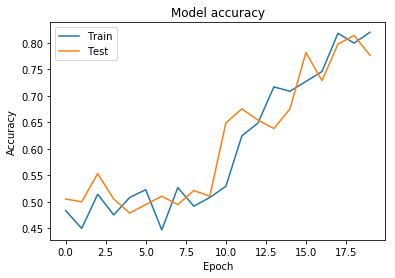

In [213]:
plt.plot(historyD.history['acc'])
plt.plot(historyD.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

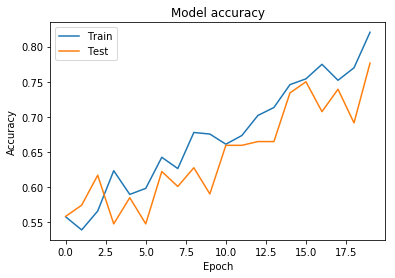

In [308]:
plt.plot(historyD.history['acc'])
plt.plot(historyD.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

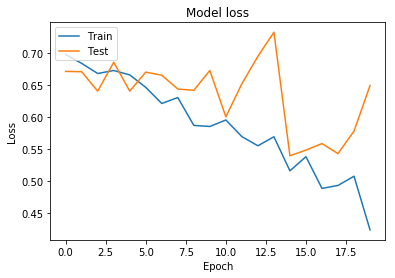

In [307]:
plt.plot(historyD.history['loss'])
plt.plot(historyD.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [215]:
from skimage.transform import rotate

In [219]:
a = rotate(X_train_shuff[0,:,:,0],25)

In [220]:
a.shape

(128, 128)

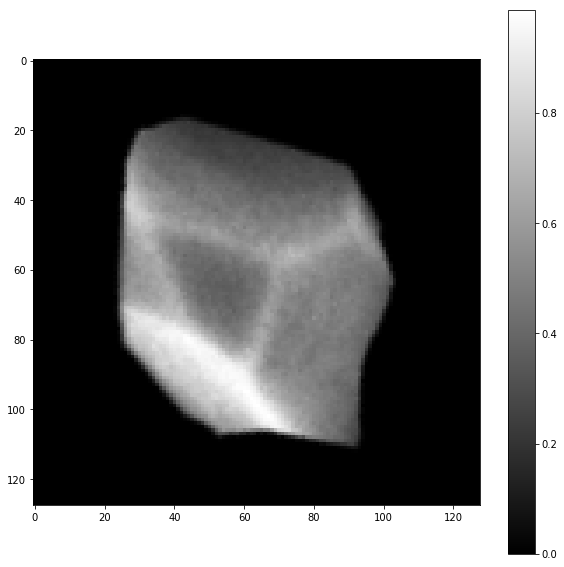

In [221]:
rdp.imm(a,a.shape)

In [222]:
Y_train_shuff[0]

array([0, 1])

In [223]:
b = rotate(X_train_shuff[0,:,:,0],90)

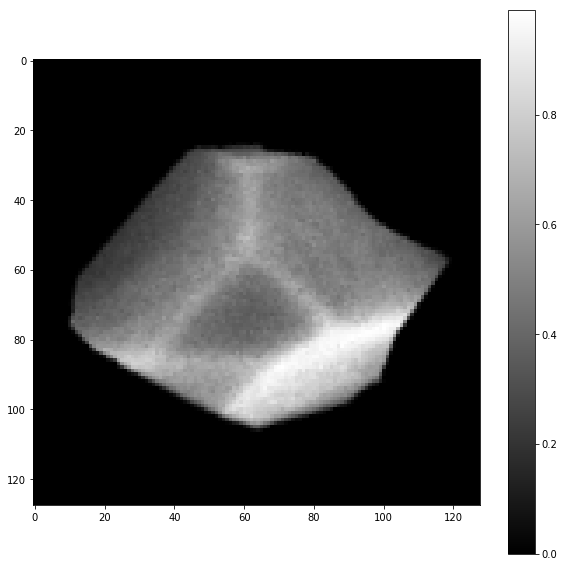

In [224]:
rdp.imm(b,b.shape)

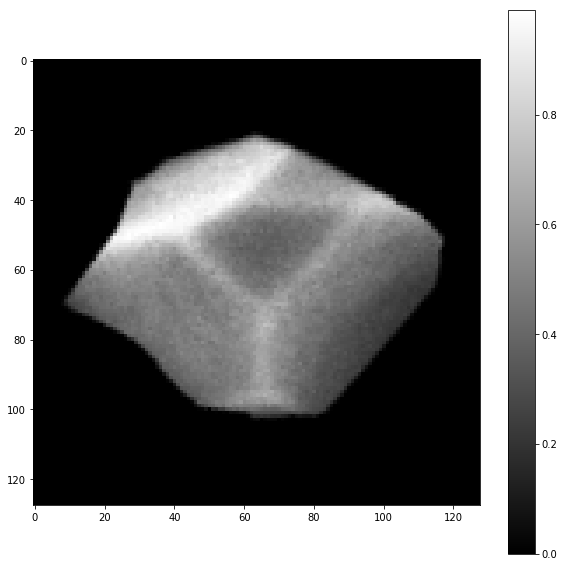

In [229]:
b = rotate(X_train_shuff[0,:,:,0],-90)

rdp.imm(b,b.shape)

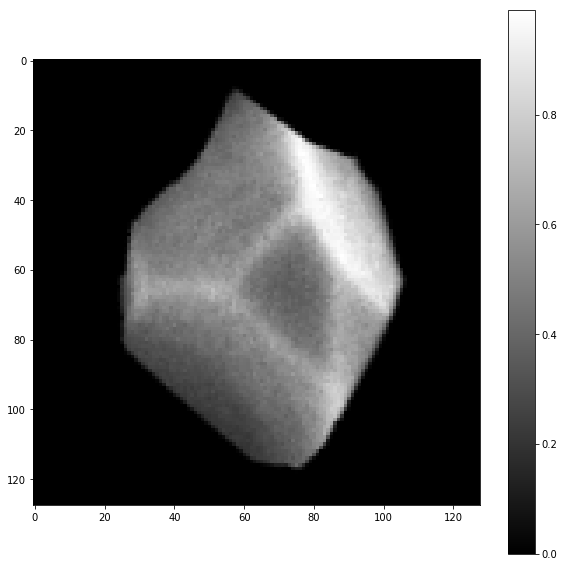

In [228]:
c = rotate(X_train_shuff[0,:,:,0],-180)

rdp.imm(c,c.shape)

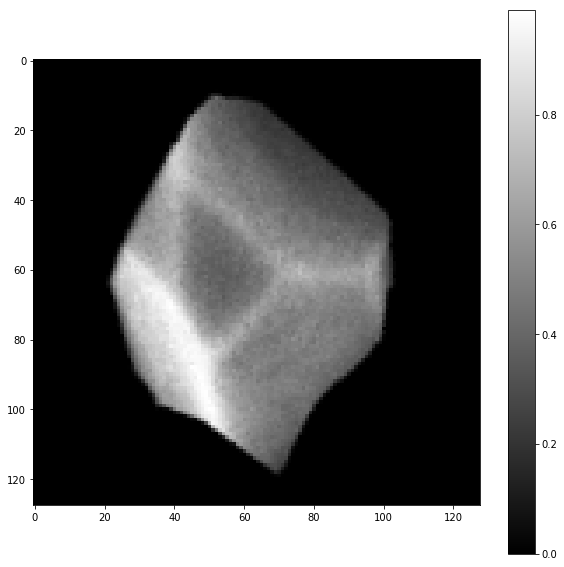

In [227]:
rdp.imm(X_train_shuff[0],(128,128))

In [226]:
Y_train_shuff[0]

array([0, 1])

# Trying 0-90 pairs

In [286]:
right_rot_90 = []
right_rot_180 = []
left_rot_90 = []
left_rot_180 = []
for img in right_images:
    right_rot_90.append(rotate(img,90))
    right_rot_90.append(rotate(img,-90))
    right_rot_180.append(rotate(img,180))
for img in left_images:
    left_rot_90.append(rotate(img,90))
    left_rot_90.append(rotate(img,-90))
    left_rot_180.append(rotate(img,180))

In [287]:
all_right = np.concatenate((right_images,right_rot_90,right_rot_180),axis =0)
all_left = np.concatenate((left_images,left_rot_90,left_rot_180),axis=0)
all_right_labels = [[1,0] for i in np.arange(0,len(all_right))]
all_left_labels = [[1,0] for i in np.arange(0,len(all_left))]

In [288]:
all_right_shuff = utils.shuffle(all_right,random_state=0)

In [289]:
all_left_shuff = utils.shuffle(all_left,random_state=0)

In [290]:
all_right.shape

(624, 128, 128)

In [291]:
all_left.shape

(624, 128, 128)

In [292]:
X_train = np.concatenate((all_right_shuff[:-156],all_left_shuff[:-156]),axis =0)
Y_train = np.concatenate((all_right_labels[:-156],all_left_labels[:-156]),axis = 0)
X_test = np.concatenate((all_right_shuff[-156:],all_left_shuff[-156:]),axis = 0)
Y_test = np.concatenate((all_right_labels[-156:],all_left_labels[-156:]),axis = 0)

In [293]:
X_train_norm = X_train/X_train.max()
X_test_norm = X_test/X_test.max()

X_train_norm = np.expand_dims(X_train_norm,axis=3)
X_test_norm = np.expand_dims(X_test_norm,axis=3)

X_train_shuff, Y_train_shuff = utils.shuffle(X_train_norm, Y_train,random_state=0)
X_test_shuff, Y_test_shuff = utils.shuffle(X_test_norm, Y_test,random_state=0)

In [303]:
modelZ = Sequential()
modelZ.add(Conv2D(32, (3, 3), input_shape=(128, 128,1)))
modelZ.add(Activation('relu'))
modelZ.add(MaxPooling2D(pool_size=(2, 2)))

modelZ.add(Conv2D(32, (3, 3)))
modelZ.add(Activation('relu'))
modelZ.add(MaxPooling2D(pool_size=(2, 2)))

modelZ.add(Conv2D(64, (3, 3)))
modelZ.add(Activation('relu'))
modelZ.add(MaxPooling2D(pool_size=(2, 2)))

modelZ.add(Conv2D(64, (3, 3)))
modelZ.add(Activation('relu'))
modelZ.add(MaxPooling2D(pool_size=(2, 2)))

modelZ.add(Conv2D(64, (3, 3)))
modelZ.add(Activation('relu'))
modelZ.add(MaxPooling2D(pool_size=(2, 2)))

modelZ.add(Flatten())  # this converts our 3D feature maps to 1D feature vectors
modelZ.add(Dense(64))
modelZ.add(Activation('relu'))
modelZ.add(Dropout(0.5))
modelZ.add(Dense(2))
modelZ.add(Activation('softmax'))

modelZ.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

In [298]:
from keras.callbacks import EarlyStopping, ModelCheckpoint, TensorBoard

In [300]:
save_weights = 'chiralnet_5conv_vZ.h5'

In [301]:
earlyStopping = EarlyStopping(monitor='val_loss',
                              patience=2,
                              verbose=2,
                              min_delta = 0.001,
                              mode='min',)

modelCheckpoint = ModelCheckpoint(save_weights,
                                  monitor = 'val_loss',
                                  save_best_only = True,
                                  mode = 'min',
                                  verbose = 2,
                                  save_weights_only = True)
callbacks_list = [modelCheckpoint,earlyStopping]

In [295]:
train_datagen = ImageDataGenerator(
        rotation_range = 10,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=False,
        vertical_flip = False)

test_datagen = ImageDataGenerator(rotation_range = 10)

train_generator = train_datagen.flow(X_train_shuff, y=Y_train_shuff, batch_size=batch_size,seed=seed)
val_generator = test_datagen.flow(X_test_shuff,y=Y_test_shuff,batch_size=batch_size,seed=seed)

In [305]:
historyZ = modelZ.fit_generator(
        train_generator,
        steps_per_epoch=500 // batch_size,
        epochs=20,
        validation_data=val_generator,
        validation_steps=200 // batch_size, callbacks=callbacks_list)

Epoch 1/20
31/31 [==============================] - 7s 232ms/step - loss: 0.0305 - acc: 1.0000 - val_loss: 1.2480e-07 - val_acc: 1.0000

Epoch 00001: val_loss improved from inf to 0.00000, saving model to chiralnet_5conv_vZ.h5
Epoch 2/20
31/31 [==============================] - 6s 206ms/step - loss: 1.4343e-05 - acc: 1.0000 - val_loss: 1.1921e-07 - val_acc: 1.0000

Epoch 00002: val_loss improved from 0.00000 to 0.00000, saving model to chiralnet_5conv_vZ.h5
Epoch 3/20
31/31 [==============================] - 6s 207ms/step - loss: 2.7840e-07 - acc: 1.0000 - val_loss: 1.1921e-07 - val_acc: 1.0000

Epoch 00003: val_loss did not improve from 0.00000
Epoch 00003: early stopping


In [297]:
del modelZ

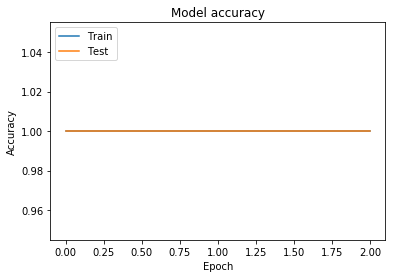

In [306]:
plt.plot(historyZ.history['acc'])
plt.plot(historyZ.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()